LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50, MobileNetV2, VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMPORT DATA

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data and convert labels to one-hot encoding
x_train = x_train.astype(np.float32) / 255.0
y_train = to_categorical(y_train, 10)


x_test = x_test.astype(np.float32) / 255.0
y_test = to_categorical(y_test, 10)

# Split the data into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


DATA AUGMENTATION

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.2)

datagen.fit(x_train)

MODEL 1

In [ ]:
#base simple
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
313/313 [==============================] - 6s 7ms/step - loss: 1.6232 - accuracy: 0.4153 - val_loss: 1.3689 - val_accuracy: 0.5121
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 1.2913 - accuracy: 0.5438 - val_loss: 1.2353 - val_accuracy: 0.5663
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1.1585 - accuracy: 0.5936 - val_loss: 1.1275 - val_accuracy: 0.6023
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1.0498 - accuracy: 0.6320 - val_loss: 1.0399 - val_accuracy: 0.6331
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 0.9733 - accuracy: 0.6594 - val_loss: 0.9823 - val_accuracy: 0.6532
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 0.9084 - accuracy: 0.6817 - val_loss: 0.9838 - val_accuracy: 0.6603
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 0.8550 - accuracy: 0.7028 - val_loss: 0.9468 - val_accuracy: 0.6707
Epoch 

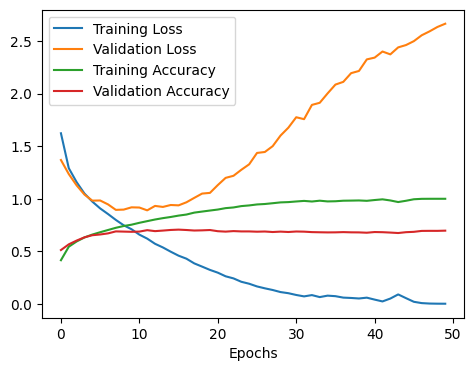

313/313 [==============================] - 1s 2ms/step - loss: 2.6659 - accuracy: 0.6966


[2.665853500366211, 0.6966000199317932]

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model1.evaluate(x_train, y_train)
model1.evaluate(x_val, y_val)

MODEL 2

In [ ]:
# Create a more complex Sequential model named "model3" with dropout layers
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       147584    
                                                      

Epoch 1/50
313/313 [==============================] - 7s 12ms/step - loss: 1.8676 - accuracy: 0.2949 - val_loss: 1.4210 - val_accuracy: 0.4608
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 1.3949 - accuracy: 0.4926 - val_loss: 1.1431 - val_accuracy: 0.5908
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.1784 - accuracy: 0.5809 - val_loss: 1.0267 - val_accuracy: 0.6280
Epoch 4/50
313/313 [==============================] - 3s 10ms/step - loss: 1.0473 - accuracy: 0.6338 - val_loss: 0.9362 - val_accuracy: 0.6724
Epoch 5/50
313/313 [==============================] - 3s 10ms/step - loss: 0.9517 - accuracy: 0.6682 - val_loss: 0.8174 - val_accuracy: 0.7101
Epoch 6/50
313/313 [==============================] - 3s 10ms/step - loss: 0.8854 - accuracy: 0.6912 - val_loss: 0.8368 - val_accuracy: 0.7088
Epoch 7/50
313/313 [==============================] - 3s 10ms/step - loss: 0.8331 - accuracy: 0.7080 - val_loss: 0.7569 - val_accuracy: 0.7323

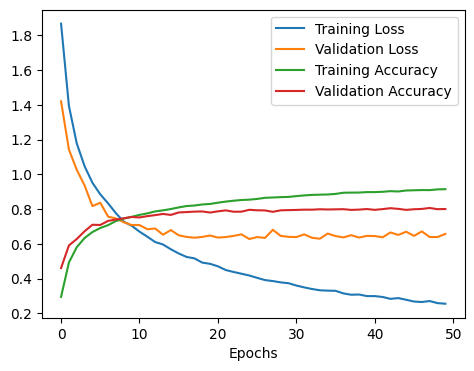

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
model2.evaluate(x_val, y_val)
model2.evaluate(x_train, y_train)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.0457 - accuracy: 0.9946


[0.045727141201496124, 0.994575023651123]

SEARCH LEARNING RATE WITH MODEL 2

In [ ]:
# Learning rates to search
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Results
best_accuracy = 0.0
best_model = None
best_learning_rate = None
accuracy_list_model2 = []
for lr in learning_rates:
    # Create a new instance of "model3" for each learning rate
    model2 = Sequential()

    model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model2.add(Conv2D(64, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(512, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(256, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(128, activation='relu'))
    model2.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=lr)
    model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model2.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

    # Evaluate the model on the validation set
    _, accuracy = model2.evaluate(x_val, y_val)
    accuracy_list_model2 .append(accuracy)
    # Check if this model has the highest accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model2
        best_learning_rate = lr

# Print the best learning rate and accuracy
print(f'Best learning rate: {best_learning_rate}')
print(f'Best validation accuracy: {best_accuracy}')
print(accuracy_list_model2)

Epoch 1/50
625/625 [==============================] - 7s 7ms/step - loss: 2.0291 - accuracy: 0.2263 - val_loss: 1.6921 - val_accuracy: 0.3746
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 1.6471 - accuracy: 0.3885 - val_loss: 1.4376 - val_accuracy: 0.4725
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 1.4832 - accuracy: 0.4588 - val_loss: 1.3207 - val_accuracy: 0.5226
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 1.3801 - accuracy: 0.4976 - val_loss: 1.2316 - val_accuracy: 0.5481
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 1.2939 - accuracy: 0.5309 - val_loss: 1.1654 - val_accuracy: 0.5877
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 1.2210 - accuracy: 0.5633 - val_loss: 1.0931 - val_accuracy: 0.6037
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 1.1554 - accuracy: 0.5884 - val_loss: 1.0318 - val_accuracy: 0.6262
Epoch 

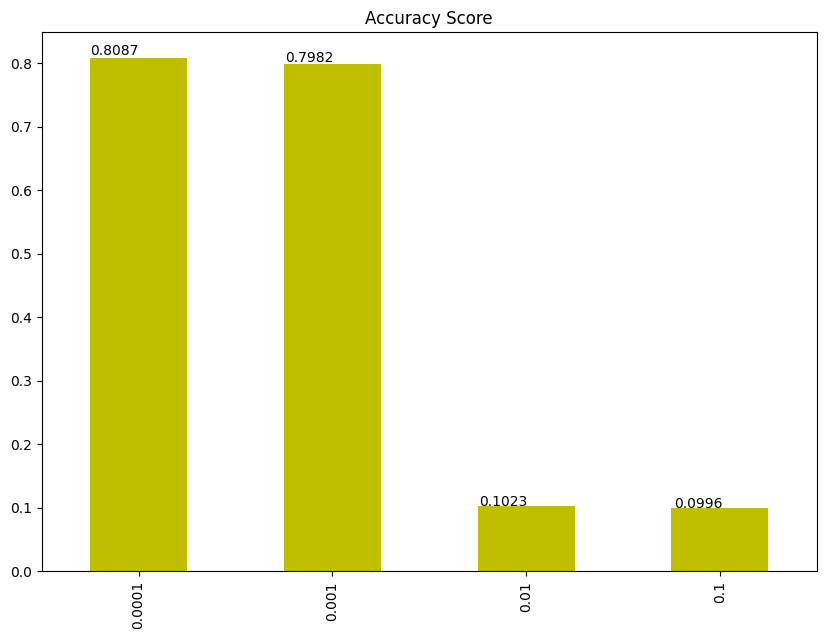

In [ ]:

metric_val = {
    "accuracy score": {
    "0.0001": accuracy_list_model2[0],
    "0.001": accuracy_list_model2[1],
    "0.01": accuracy_list_model2[2],
    "0.1": accuracy_list_model2[3]
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar",
                             figsize = (10,7),
                             legend =False,
                             title = "Accuracy Score",
                             color = "y");

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 4)), (p.get_x() * 1.005, p.get_height() * 1.005))

RESNET50

Epoch 1/50
313/313 [==============================] - 46s 52ms/step - loss: 1.3413 - accuracy: 0.5455 - val_loss: 6.4196 - val_accuracy: 0.1024
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 0.6753 - accuracy: 0.7680 - val_loss: 4.4028 - val_accuracy: 0.1389
Epoch 3/50
313/313 [==============================] - 15s 46ms/step - loss: 0.3919 - accuracy: 0.8669 - val_loss: 1.3244 - val_accuracy: 0.5979
Epoch 4/50
313/313 [==============================] - 14s 46ms/step - loss: 0.2331 - accuracy: 0.9216 - val_loss: 0.9057 - val_accuracy: 0.7368
Epoch 5/50
313/313 [==============================] - 14s 45ms/step - loss: 0.1581 - accuracy: 0.9474 - val_loss: 0.9477 - val_accuracy: 0.7442
Epoch 6/50
313/313 [==============================] - 14s 44ms/step - loss: 0.1256 - accuracy: 0.9570 - val_loss: 1.0082 - val_accuracy: 0.7483
Epoch 7/50
313/313 [==============================] - 14s 45ms/step - loss: 0.1045 - accuracy: 0.9647 - val_loss: 1.0045 - val_accuracy:

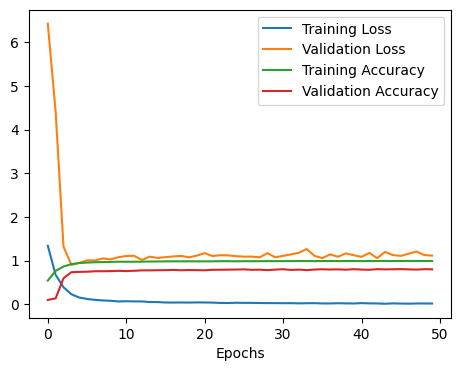

313/313 [==============================] - 3s 9ms/step - loss: 1.1170 - accuracy: 0.8033


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model with learning rate 0.0001 saved.
Validation accuracy: 0.8033000230789185


In [ ]:
# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_res50_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_res50_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_50_1 = model_res50_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_50_1.history['loss'], label='Training Loss')
plt.plot(his_50_1.history['val_loss'], label='Validation Loss')
plt.plot(his_50_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_50_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_res50_1.evaluate(x_val, y_val)

# Save the model
model_res50_1.save(f'resnet50_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 43s 49ms/step - loss: 1.1187 - accuracy: 0.6405 - val_loss: 2.9395 - val_accuracy: 0.1143
Epoch 2/50
313/313 [==============================] - 14s 45ms/step - loss: 0.6762 - accuracy: 0.7747 - val_loss: 3.1884 - val_accuracy: 0.1669
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 0.5335 - accuracy: 0.8212 - val_loss: 1.2058 - val_accuracy: 0.6043
Epoch 4/50
313/313 [==============================] - 14s 44ms/step - loss: 0.4471 - accuracy: 0.8503 - val_loss: 0.7419 - val_accuracy: 0.7688
Epoch 5/50
313/313 [==============================] - 13s 43ms/step - loss: 0.3704 - accuracy: 0.8748 - val_loss: 0.9212 - val_accuracy: 0.7369
Epoch 6/50
313/313 [==============================] - 13s 42ms/step - loss: 0.3209 - accuracy: 0.8932 - val_loss: 0.8689 - val_accuracy: 0.7323
Epoch 7/50
313/313 [==============================] - 13s 43ms/step - loss: 0.2655 - accuracy: 0.9115 - val_loss: 1.0007 - val_accuracy:

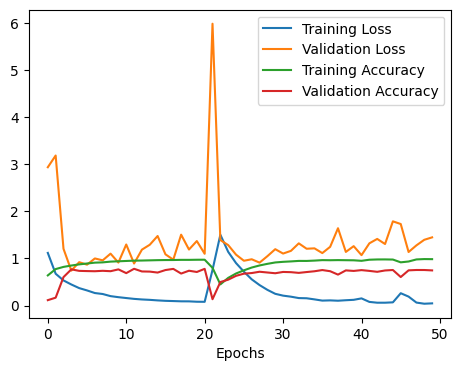

313/313 [==============================] - 3s 9ms/step - loss: 1.4490 - accuracy: 0.7467
Model with learning rate 0.001 saved.
Validation accuracy: 0.7466999888420105


In [ ]:
# Define the learning rate
learning_rate = 0.001

# Load a pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_res50_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_res50_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_50_2 = model_res50_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_50_2.history['loss'], label='Training Loss')
plt.plot(his_50_2.history['val_loss'], label='Validation Loss')
plt.plot(his_50_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_50_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_res50_2.evaluate(x_val, y_val)

# Save the model
model_res50_2.save(f'cifar10_resnet50_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

VGG16

Epoch 1/50
313/313 [==============================] - 13s 26ms/step - loss: 0.8874 - accuracy: 0.6903 - val_loss: 0.6680 - val_accuracy: 0.7696
Epoch 2/50
313/313 [==============================] - 7s 22ms/step - loss: 0.5382 - accuracy: 0.8126 - val_loss: 0.5149 - val_accuracy: 0.8240
Epoch 3/50
313/313 [==============================] - 7s 22ms/step - loss: 0.3940 - accuracy: 0.8623 - val_loss: 0.4826 - val_accuracy: 0.8381
Epoch 4/50
313/313 [==============================] - 7s 22ms/step - loss: 0.2744 - accuracy: 0.9046 - val_loss: 0.5157 - val_accuracy: 0.8379
Epoch 5/50
313/313 [==============================] - 7s 22ms/step - loss: 0.1992 - accuracy: 0.9301 - val_loss: 0.4678 - val_accuracy: 0.8556
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.1324 - accuracy: 0.9532 - val_loss: 0.5230 - val_accuracy: 0.8544
Epoch 7/50
313/313 [==============================] - 7s 22ms/step - loss: 0.0890 - accuracy: 0.9692 - val_loss: 0.7063 - val_accuracy: 0.829

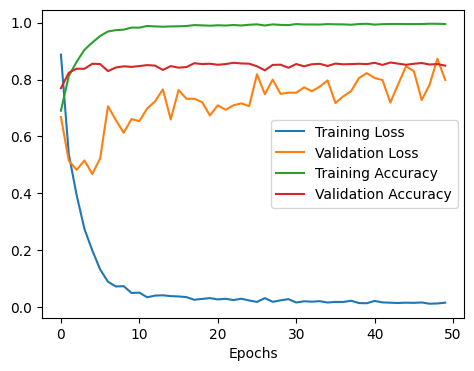

Model with learning rate 0.0001 saved.
Validation accuracy: 0.8489000201225281


In [ ]:
# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_vgg_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_vgg_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_vgg_1 = model_vgg_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
_, accuracy = model_vgg_1.evaluate(x_val, y_val)
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_vgg_1.history['loss'], label='Training Loss')
plt.plot(his_vgg_1.history['val_loss'], label='Validation Loss')
plt.plot(his_vgg_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_vgg_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Save the model
model_vgg_1.save(f'cifar10_vgg16_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 11s 24ms/step - loss: 1.9616 - accuracy: 0.1995 - val_loss: 1.7724 - val_accuracy: 0.2570
Epoch 2/50
313/313 [==============================] - 7s 22ms/step - loss: 1.6686 - accuracy: 0.3137 - val_loss: 1.5110 - val_accuracy: 0.3957
Epoch 3/50
313/313 [==============================] - 7s 22ms/step - loss: 1.3585 - accuracy: 0.4706 - val_loss: 1.1841 - val_accuracy: 0.5653
Epoch 4/50
313/313 [==============================] - 7s 22ms/step - loss: 1.0440 - accuracy: 0.6251 - val_loss: 1.2019 - val_accuracy: 0.5849
Epoch 5/50
313/313 [==============================] - 7s 22ms/step - loss: 0.8536 - accuracy: 0.6993 - val_loss: 0.8632 - val_accuracy: 0.6997
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.7154 - accuracy: 0.7527 - val_loss: 0.7655 - val_accuracy: 0.7425
Epoch 7/50
313/313 [==============================] - 7s 22ms/step - loss: 0.6349 - accuracy: 0.7853 - val_loss: 0.7645 - val_accuracy: 0.748

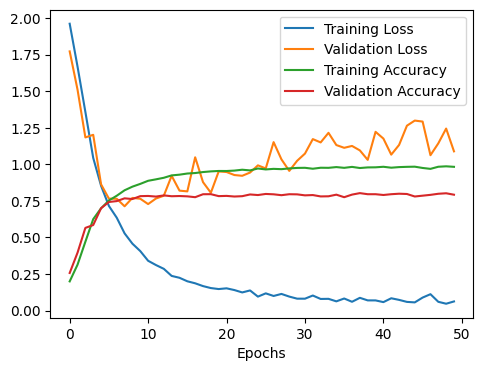

Model with learning rate 0.001 saved.
Validation accuracy: 0.7922999858856201


In [ ]:
# Define the learning rate
learning_rate = 0.001

# Load a pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_vgg_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_vgg_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_vgg_2 = model_vgg_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Evaluate the model on the validation set
_, accuracy = model_vgg_2.evaluate(x_val, y_val)
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_vgg_2.history['loss'], label='Training Loss')
plt.plot(his_vgg_2.history['val_loss'], label='Validation Loss')
plt.plot(his_vgg_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_vgg_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Save the model
model_vgg_2.save(f'cifar10_vgg16_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

MOBILENETV2

Epoch 1/50
313/313 [==============================] - 34s 37ms/step - loss: 1.7519 - accuracy: 0.3915 - val_loss: 2.3408 - val_accuracy: 0.1283
Epoch 2/50
313/313 [==============================] - 10s 32ms/step - loss: 1.2410 - accuracy: 0.5597 - val_loss: 2.3265 - val_accuracy: 0.1709
Epoch 3/50
313/313 [==============================] - 11s 34ms/step - loss: 1.0357 - accuracy: 0.6323 - val_loss: 2.0422 - val_accuracy: 0.2643
Epoch 4/50
313/313 [==============================] - 10s 32ms/step - loss: 0.8929 - accuracy: 0.6840 - val_loss: 1.8776 - val_accuracy: 0.3636
Epoch 5/50
313/313 [==============================] - 10s 32ms/step - loss: 0.7752 - accuracy: 0.7266 - val_loss: 1.7289 - val_accuracy: 0.4537
Epoch 6/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6876 - accuracy: 0.7594 - val_loss: 1.5249 - val_accuracy: 0.5018
Epoch 7/50
313/313 [==============================] - 10s 32ms/step - loss: 0.6030 - accuracy: 0.7865 - val_loss: 1.4420 - val_accuracy:

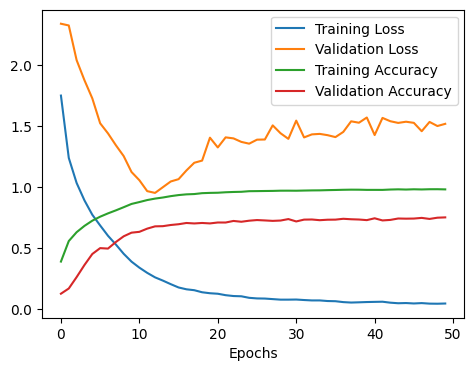

313/313 [==============================] - 2s 7ms/step - loss: 1.5203 - accuracy: 0.7537
Model with learning rate 0.0001 saved.
Validation accuracy: 0.7537000179290771


In [ ]:

# Define the learning rate
learning_rate = 0.0001

# Load a pre-trained MobileNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_dense_1 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_dense_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_dense_1 = model_dense_1.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_dense_1.history['loss'], label='Training Loss')
plt.plot(his_dense_1.history['val_loss'], label='Validation Loss')
plt.plot(his_dense_1.history['accuracy'], label='Training Accuracy')
plt.plot(his_dense_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_dense_1.evaluate(x_val, y_val)

# Save the model
model_dense_1.save(f'cifar10_mobilenetv2_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

Epoch 1/50
313/313 [==============================] - 30s 33ms/step - loss: 1.2640 - accuracy: 0.5706 - val_loss: 6.8212 - val_accuracy: 0.1655
Epoch 2/50
313/313 [==============================] - 10s 32ms/step - loss: 0.7844 - accuracy: 0.7340 - val_loss: 2.5705 - val_accuracy: 0.3616
Epoch 3/50
313/313 [==============================] - 10s 31ms/step - loss: 0.6223 - accuracy: 0.7875 - val_loss: 2.1269 - val_accuracy: 0.4249
Epoch 4/50
313/313 [==============================] - 10s 31ms/step - loss: 0.5388 - accuracy: 0.8147 - val_loss: 1.7582 - val_accuracy: 0.4740
Epoch 5/50
313/313 [==============================] - 10s 31ms/step - loss: 0.4855 - accuracy: 0.8364 - val_loss: 1.8884 - val_accuracy: 0.5044
Epoch 6/50
313/313 [==============================] - 10s 30ms/step - loss: 0.4372 - accuracy: 0.8495 - val_loss: 1.5212 - val_accuracy: 0.5883
Epoch 7/50
313/313 [==============================] - 10s 32ms/step - loss: 0.3905 - accuracy: 0.8668 - val_loss: 1.7164 - val_accuracy:

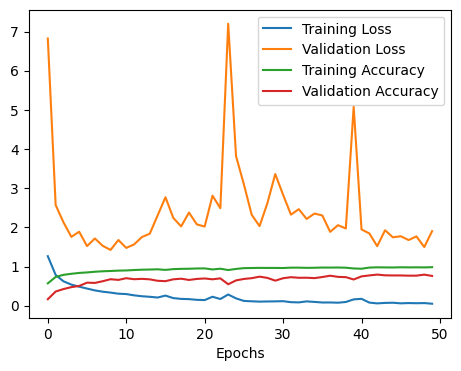

313/313 [==============================] - 2s 7ms/step - loss: 1.9038 - accuracy: 0.7598
Model with learning rate 0.001 saved.
Validation accuracy: 0.7598000168800354


In [ ]:

# Define the learning rate
learning_rate = 0.001

# Load a pre-trained MobileNetV2 model (excluding the top classification layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add a custom top classification layer for CIFAR-10
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model_dense_2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model_dense_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
his_dense_2 =model_dense_2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(his_dense_2.history['loss'], label='Training Loss')
plt.plot(his_dense_2.history['val_loss'], label='Validation Loss')
plt.plot(his_dense_2.history['accuracy'], label='Training Accuracy')
plt.plot(his_dense_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()
# Evaluate the model on the validation set
_, accuracy = model_dense_2.evaluate(x_val, y_val)

# Save the model
model_dense_2.save(f'cifar10_mobilenetv2_lr{learning_rate}.h5')
print(f'Model with learning rate {learning_rate} saved.')
print(f'Validation accuracy: {accuracy}')

BASE LINE

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

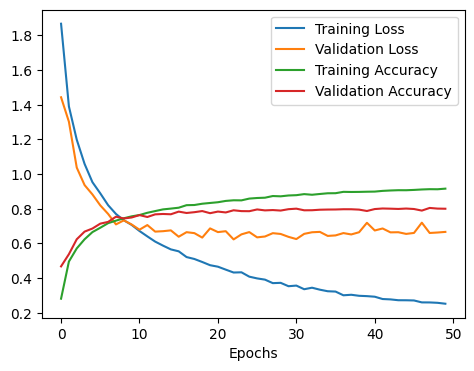

313/313 [==============================] - 1s 3ms/step - loss: 0.6887 - accuracy: 0.7948


[0.6886787414550781, 0.7947999835014343]

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 10, 10, 128)       147584    
                                                      

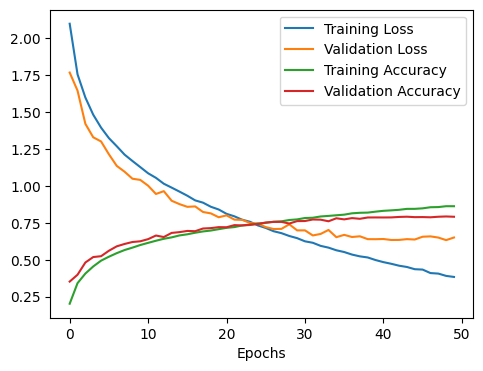

313/313 [==============================] - 1s 3ms/step - loss: 0.6747 - accuracy: 0.7837


[0.6746553778648376, 0.7836999893188477]

In [ ]:
# Create a more complex Sequential model named "model3" with dropout layers
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))  # Add dropout after the max-pooling layer

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history2 = model2.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

model2.evaluate(x_test, y_test)

PREDICT ON TEST SET

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/resnet50_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 1.1481 - accuracy: 0.7960


In [ ]:

model = keras.models.load_model('/content/cifar10_resnet50_lr0.001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 9ms/step - loss: 1.4768 - accuracy: 0.7482


In [ ]:
model = keras.models.load_model('/content/cifar10_vgg16_lr0.001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0647 - accuracy: 0.7946


In [ ]:

model = keras.models.load_model('/content/cifar10_vgg16_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8449 - accuracy: 0.8440


In [ ]:

model = keras.models.load_model('/content/cifar10_mobilenetv2_lr0.0001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.5375 - accuracy: 0.7536


In [ ]:

model = keras.models.load_model('/content/cifar10_mobilenetv2_lr0.001.h5')
# Use the model to make predictions
loss, accuray = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.9081 - accuracy: 0.7610
